In [3]:
import pandas as pd
import numpy as np
from mod_genetic import run_genetic as rg
from mod_packs import quantum_potential as qp
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
price_df = pd.read_excel('PRICE INDEX.xlsx').dropna().set_index('Date')
price_val = price_df.T.values
names = [price_df.columns[i][:3] for i in range(8)]
names

['S&P', 'FTS', 'DAX', 'TOP', 'SHA', 'KOR', 'NIK', 'DOW']

In [6]:
five_port_df = pd.read_csv('portfos').set_index('Unnamed: 0')
df = five_port_df

In [7]:
portfos_return = []
for i in range(5):
    portfos_return.append(qp.ind_generator([qp.scaled_return(price_val[j], 1) for j in range(8)], df.T[df.T.columns[i]].values/100))


In [8]:
total_scaled_portfos = []
total_scaled_std = []
data_x_scaled = np.arange(1,200,2)
for k in range(5):
    total_scaled_portfos.append([])
    total_scaled_std.append([])
    for sc in data_x_scaled:
        scaled_portfo = qp.scaled_return_of_return(portfos_return[k] , sc)
        dp , up = qp.risk_data_input(scaled_portfo , 0.0005)
        total_scaled_portfos[-1].append(np.round(up - dp , 2))
        total_scaled_std[-1].append(np.std(scaled_portfo))

In [9]:
total_scaled_portfos[0][0]=0.08

In [10]:
fit_tot = []
for i in range(5):    
    fit = np.polyfit(np.log(data_x_scaled),np.log(np.array(total_scaled_portfos[i])),1 , cov=True)
    fet = np.poly1d(fit[0])
    fit_tot.append(fit)

Text(0, 0.5, 'Risk')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


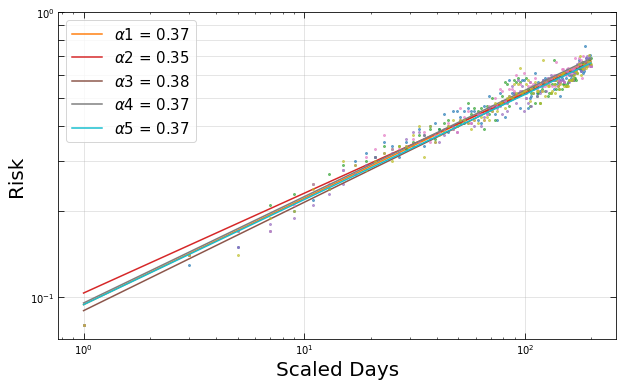

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for num in [0,1 , 2, 3 , 4]:
    
    covariance_matrix = fit_tot[num][1]
    unc = np.sqrt(np.diag(covariance_matrix))
    slope = fit_tot[num][0][0]
    intercept = fit_tot[num][0][1]
    slopes = np.linspace(slope-unc[0],slope+unc[0],20) #take 20 slopes in unc range
    intercepts = np.linspace(intercept-unc[1],intercept+unc[1],20) # take 20 intercepts in unc range
    fet = np.poly1d(fit_tot[num][0])
    data_x = data_x_scaled

    line_array = np.empty([20,len(data_x)])
    for i in range(len(slopes)):
        line_array[i] = data_x*slopes[i]+intercepts[i]


    lower_edge = np.min(line_array,axis=0)
    upper_edge = np.max(line_array,axis=0)

#     for i in range(len(slopes)):
#         fett = np.poly1d([slopes[i] , intercepts[i]])
#         data_x = np.arange(1,200)
#         data_y = total_scaled_portfos[num]
#         best_fit_y = np.exp(fett(np.log(data_x)))
#         if num == 0 :
#             ax.loglog(data_x,best_fit_y,'k', alpha=0.4,color='gray')
#         elif num == 1 :
#             ax.loglog(data_x,best_fit_y,'k', alpha=0.2,color='red')
#         elif num==0 and i==10:
#             ax.loglog(data_x,best_fit_y,'k',label='fit uncertainty'  , alpha=0.2,color='gray')   


    data_y = total_scaled_portfos[num]
    best_fit_y = np.exp(fet(np.log(data_x)))
    
    ax.loglog(data_x,data_y,'.' , alpha = 0.6 ,markersize=4)

    ax.loglog(data_x,best_fit_y,label=r'$\alpha$'+str(num+1)+' = ' +str(np.round(fit_tot[num][0][0],2)))


ax.legend(loc=2 ,fontsize=15)
ax.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax.tick_params(which='major',length=6)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.yaxis.set_minor_locator(YminorLocator)
ax.set_yticks([0.1 ,0.2,0.3,0.4,0.5,0.6,0.7 , 0.8 , 0.9,1])
plt.grid(alpha=0.4);
ax.set_xlabel('Scaled Days' , fontsize=20)
ax.set_ylabel('Risk',  fontsize=20)
# plt.savefig('fig3_a.png', dpi=300, bbox_inches='tight')

In [12]:
fit_std_tot = []
for i in range(5):    
    fit_std = np.polyfit(np.log(data_x_scaled),np.log(np.array(total_scaled_std[i])),1 , cov=True)
    fet_std = np.poly1d(fit_std[0])
    fit_std_tot.append(fit_std)

Text(0, 0.5, 'STD')

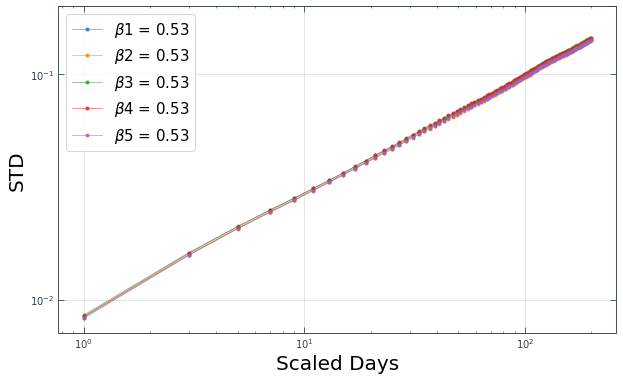

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for nums in [0,1 , 2, 3 , 4]:
    
    covariance_matrixs = fit_std_tot[num][1]
    uncs = np.sqrt(np.diag(covariance_matrixs))
    slopes = fit_std_tot[nums][0][0]
    intercepts = fit_std_tot[nums][0][1]
    slopess = np.linspace(slopes-uncs[0],slopes+uncs[0],20) #take 20 slopes in unc range
    interceptss = np.linspace(intercepts-uncs[1],intercepts+uncs[1],20) # take 20 intercepts in unc range
    fet_std = np.poly1d(fit_std_tot[nums][0])
    data_x = data_x_scaled

    line_arrays = np.empty([20,len(data_x)])
    for i in range(len(slopess)):
        line_arrays[i] = data_x*slopess[i]+interceptss[i]


    lower_edges = np.min(line_arrays,axis=0)
    upper_edges = np.max(line_arrays,axis=0)

#     for i in range(len(slopes)):
#         fett = np.poly1d([slopes[i] , intercepts[i]])
#         data_x = np.arange(1,200)
#         data_y = total_scaled_portfos[num]
#         best_fit_y = np.exp(fett(np.log(data_x)))
#         if num == 0 :
#             ax.loglog(data_x,best_fit_y,'k', alpha=0.4,color='gray')
#         elif num == 1 :
#             ax.loglog(data_x,best_fit_y,'k', alpha=0.2,color='red')
#         elif num==0 and i==10:
#             ax.loglog(data_x,best_fit_y,'k',label='fit uncertainty'  , alpha=0.2,color='gray')   


    data_ys = total_scaled_std[nums]
    best_fit_ys = np.exp(fet_std(np.log(data_x)))
    
    ax.loglog(data_x,data_ys,'.-' , alpha = 0.8 ,markersize=6 ,linewidth = 0.6, label=r'$\beta$'+str(nums+1)+' = '+str(np.round(fit_std_tot[nums][0][0],2)))

#     if num == 1:
#         ax.loglog(data_x,best_fit_ys,'',label='Slope(portfolio 2) = '+str(np.round(fit_std_tot[nums][0][0],2)))
#     else: 
#         ax.loglog(data_x,best_fit_ys,'',label='Slope(portfolio 1) = ' +str(np.round(fit_std_tot[nums][0][0],2)))


ax.legend(loc=2 ,fontsize=15)
ax.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax.tick_params(which='major',length=6)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.yaxis.set_minor_locator(YminorLocator)
ax.set_yticks([0.01, 0.1 ,0.2,])
plt.grid(alpha=0.4);
ax.set_xlabel('Scaled Days' , fontsize=20)
ax.set_ylabel('STD',  fontsize=20)
# plt.savefig('fig3_b.png', dpi=300, bbox_inches='tight')

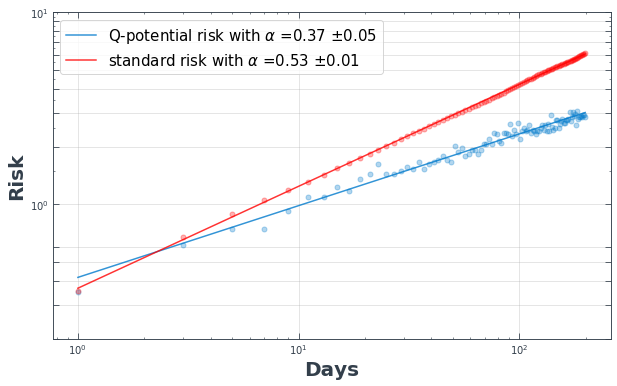

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
num = 3 
    
covariance_matrix = fit_tot[num][1]
unc = np.sqrt(np.diag(covariance_matrix))
slope = fit_tot[num][0][0]
intercept = fit_tot[num][0][1]
slopes = np.linspace(slope-unc[0],slope+unc[0],20) #take 20 slopes in unc range
intercepts = np.linspace(intercept-unc[1],intercept+unc[1],20) # take 20 intercepts in unc range
fet = np.poly1d(fit_tot[num][0])
data_x = data_x_scaled

line_array = np.empty([20,len(data_x)])
for i in range(len(slopes)):
    line_array[i] = data_x*slopes[i]+intercepts[i]


lower_edge = np.min(line_array,axis=0)
upper_edge = np.max(line_array,axis=0)

# for i in range(len(slopes)):
#     fett = np.poly1d([slopes[i] , intercepts[i]])
#     data_y = total_scaled_portfos[num]
#     best_fit_y = np.exp(fett(np.log(data_x)))
#     ax.loglog(data_x,best_fit_y,'k' , alpha=0.2,color='gray')   


data_y = total_scaled_portfos[num]
best_fit_y = np.exp(fet(np.log(data_x)))

ax.loglog(data_x,np.array(data_y)/0.228858450570679,'.' ,color = '#007acc', alpha = 0.3 ,markersize=10)

ax.loglog(data_x,np.array(best_fit_y)/0.228858450570679,color='#007acc' ,alpha =.8 ,label=r'Q-potential risk with $\alpha$ ' +'=' +str(np.round(fit_tot[num][0][0],2))+r' $\pm  0.05$')

ax.loglog(data_x,np.array(data_ys)/0.02320046769338043,'.',color='red' , alpha = 0.3 ,markersize=10 ,linewidth = 0.8)

ax.loglog(data_x,np.array(best_fit_ys)/0.02320046769338043,color = 'red', alpha = 0.8, label=r'standard risk with $\alpha$ ' +'='+str(np.round(fit_std_tot[nums][0][0],2))+r' $\pm  0.01$')


ax.legend(loc=2 ,fontsize=15)
ax.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax.tick_params(which='major',length=6)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.yaxis.set_minor_locator(YminorLocator)
ax.set_yticks([0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 1, 2 , 3 ,4 , 5, 6 , 7, 8, 9, 10 ])
plt.grid(alpha=0.4);
ax.set_xlabel('Days' ,fontsize=20, fontweight='black', color = '#333F4B')
ax.set_ylabel('Risk',  fontsize=20, fontweight='black', color = '#333F4B')
plt.savefig('fig3_a.png', dpi=300, bbox_inches='tight')